# Standard box plots

F_Gene
ESM2        4
Gene2Vec    4
GenePT      4
HyenaDNA    4
Random      4
dtype: int64
0.910926


/tmp/ipykernel_3762786/2641370183.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_3762786/2641370183.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


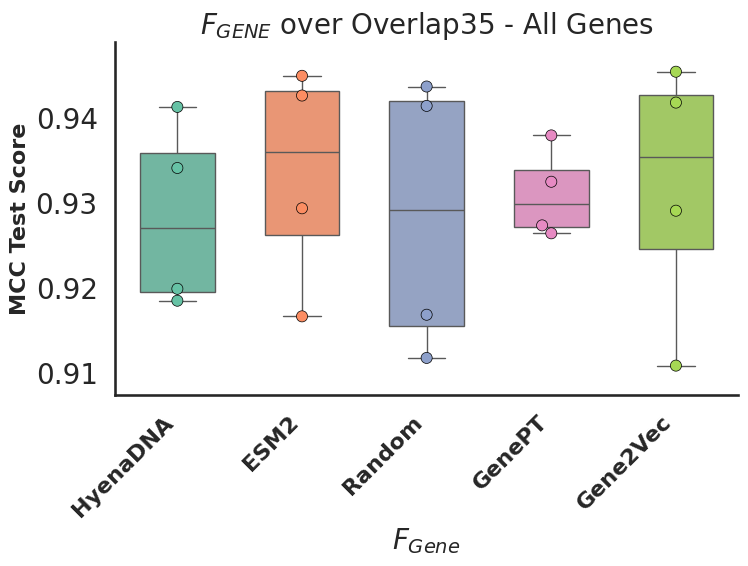

F_Gene
ESM2        4
Gene2Vec    4
GenePT      4
HyenaDNA    4
Random      4
dtype: int64
0.885413


/tmp/ipykernel_3762786/2641370183.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_3762786/2641370183.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


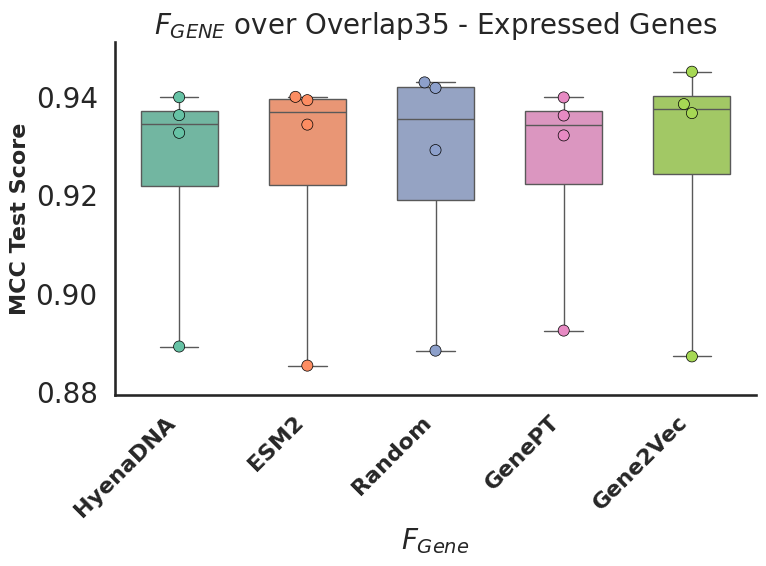

Series([], dtype: int64)
No data for $F_{GENE}$ over Overlap113 - All Genes
Series([], dtype: int64)
No data for $F_{GENE}$ over Overlap113 - Expressed Genes


In [63]:
# Let's plot it myself here, based on the updated instructions: 
# - Each plot separately
# - Separate colors for each category
# - Prettier style

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv("/work/magroup/ehaber/heimdall_plotting/spatial_splits.csv")



# Find the index of the marker row
marker_idx = df.index[df['Status'] == 'RERUN WITH ZEROS'].tolist()
if marker_idx:
    split_idx = marker_idx[0]  # first occurrence
    df['All_Genes'] = False
    df.loc[split_idx:, 'All_Genes'] = True
else:
    print("Warning: No 'RERUN WITH ZEROS' marker found. Defaulting to All_Genes=False.")
    df['All_Genes'] = False




# Preprocessing
df = df.drop(['Test Score.1', 'Run Command', 'Create Sweep Command', 'Run/Sweep Command'], axis=1)
df = df.dropna()

# Map experiment names to dataset labels
name_to_dataset = {
    "spatial_cancer_split1": "Spatial35",
    "spatial_cancer_split2": "Spatial113",  # example mapping – adjust if needed
    # add more mappings here if you have more experiments
}

df["Dataset"] = df["Experiment Name"].map(name_to_dataset)


df.loc[df['F_Expression'] == 'nonzero_2nn', 'F_Expression'] = 'Continuous'
df.loc[df['F_Expression'] == 'scfoundation', 'F_Expression'] = 'Autobin'
df.loc[df['F_Expression'] == 'sorting', 'F_Expression'] = 'Sorting'
df.loc[df['F_Expression'] == 'binning', 'F_Expression'] = 'Binning'

df.loc[df['F_Gene'] == 'identity', 'F_Gene'] = 'Random'
df.loc[df['F_Gene'] == 'pca_esm2', 'F_Gene'] = 'ESM2'
df.loc[df['F_Gene'] == 'pca_gene2vec', 'F_Gene'] = 'Gene2Vec'
df.loc[df['F_Gene'] == 'pca_hyenadna', 'F_Gene'] = 'HyenaDNA'
df.loc[df['F_Gene'] == 'pca_genept', 'F_Gene'] = 'GenePT'



# df = df[df["F_Expression"] != "sorting"c

# df = df[~df.isin(['dummy']).any(axis=1)]

# Define order of F_Gene
gene_order = ['HyenaDNA', 'ESM2', 'Random', 'GenePT', 'Gene2Vec']

# Setup plotting aesthetics
# sns.set(style="whitegrid", context="talk")
sns.set(style="white", context="talk")

palette = sns.color_palette("Set2", n_colors=df["F_Gene"].nunique())

plot_configs = [
    ('Spatial35', True, '$F_{GENE}$ over Overlap35 - All Genes'),
    ('Spatial35', False, '$F_{GENE}$ over Overlap35 - Expressed Genes'),
    ('Spatial113', True, '$F_{GENE}$ over Overlap113 - All Genes'),
    ('Spatial113', False, '$F_{GENE}$ over Overlap113 - Expressed Genes'),
]

# Mapping genes to specific color
gene_palette = dict(zip(gene_order, palette))

# Create separate plots
for dataset, all_genes, title in plot_configs:
    subset = df[(df['Dataset'] == dataset) & (df['All_Genes'] == all_genes)]
    print(subset.groupby('F_Gene').size())



    dummy_baseline_rows = subset[(subset['F_Gene'] == 'dummy') & (subset['F_Expression'] == 'dummy')]
    if dummy_baseline_rows.empty:
        print("Warning: No dummy baseline found. No baseline line will be plotted.")
        baseline_value = None
    else:
        baseline_value = dummy_baseline_rows['Test Score'].mean()
        print(f"Baseline (mean Test Score where dummy) = {baseline_value:.4f}")


    if subset.empty:
        print(f"No data for {title}")
        continue
    
    plt.figure(figsize=(8, 6))
    
    sns.boxplot(
        data=subset,
        x='F_Gene', y='Test Score',
        order=gene_order,
        whis=np.inf,
        width=0.6,
        palette=gene_palette,
        fliersize=0
    )
    
    sns.swarmplot(
        data=subset,
        x='F_Gene', y='Test Score',
        order=gene_order,
        palette=gene_palette,
        size=8,
        linewidth=0.5,
        edgecolor='black'
    )
    
    min_score = subset['Test Score'].min()
    print(min_score)
    max_score = subset['Test Score'].max()
    margin = (max_score - min_score) * 0.1
    plt.ylim(min_score - margin, max_score + margin)

    # --- Add a red dotted horizontal line at baseline value
    if baseline_value is not None:
        plt.axhline(
            y=baseline_value,
            color='red',
            linestyle='dotted',
            linewidth=2,
            label='Optimized Linear Baseline'
        )
        plt.legend(loc='lower right', fontsize=12)

    # if dataset == "Spatial35":
    #     plt.ylim(0, 0.5)
    # else:
    #     plt.ylim(0, 0.7)
    
    plt.title(title, fontsize=20)
    plt.xlabel("$F_{Gene}$", fontsize=20, weight='bold')
    plt.ylabel("MCC Test Score", fontsize=16, weight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=16, weight="bold")
    plt.yticks(fontsize=20)
    
    sns.despine()
    plt.tight_layout()
    plt.show()



# Stratified across expression methods

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# 1) Load & clean --------------------------------------------------------------------
def load_and_clean(path):
    df = pd.read_csv(path).dropna().copy()
    df.loc[df['F_Expression']=='nonzero_2nn','F_Expression'] = 'Continuous'
    df.loc[df['F_Expression']=='scfoundation','F_Expression'] = 'Autobin'
    df.loc[df['F_Expression']=='sorting',      'F_Expression'] = 'Sorting'
    df.loc[df['F_Expression']=='binning',      'F_Expression'] = 'Binning'
    df.loc[df['F_Gene']=='identity',           'F_Gene'] = 'Random'
    df.loc[df['F_Gene']=='pca_esm2',           'F_Gene'] = 'ESM2'
    df.loc[df['F_Gene']=='pca_gene2vec',       'F_Gene'] = 'Gene2Vec'
    df.loc[df['F_Gene']=='pca_hyenadna',       'F_Gene'] = 'HyenaDNA'
    df.loc[df['F_Gene']=='pca_genept',         'F_Gene'] = 'GenePT'
    return df

# 2) Stratified & hatched plotting ---------------------------------------------------
def plot_overlap(
    df, overlap, all_genes,
    gene_order, expr_order, gene_palette, hatch_map,
    box_width=0.2, spacing=0.05, extra_gap=0.2
):
    # filter on Overlap35/113
    sub = df[(df.Dataset==overlap)&(df.All_Genes==all_genes)]
    if sub.empty:
        print(f"No data for {overlap}, All_Genes={all_genes}")
        return

    # compute offsets so boxes don't overlap
    n = len(expr_order)
    offsets    = (np.arange(n) - (n-1)/2) * (box_width + spacing)
    group_total = n*box_width + (n-1)*spacing
    gene_sep    = group_total + extra_gap
    centers     = np.arange(len(gene_order)) * gene_sep

    plt.figure(figsize=(10,6))
    for gi, gene in enumerate(gene_order):
        for ei, expr in enumerate(expr_order):
            scores = sub.query("F_Gene==@gene and F_Expression==@expr")['Test Score']
            if scores.empty:
                continue
            x = centers[gi] + offsets[ei]

            plt.boxplot(
                scores,
                positions=[x],
                widths=box_width,
                patch_artist=True,
                boxprops=dict(
                    facecolor=gene_palette[gene],
                    edgecolor='k',
                    hatch=hatch_map[expr]
                ),
                whiskerprops=dict(color='k'),
                capprops=dict(color='k'),
                medianprops=dict(color='k'),
                flierprops=dict(
                    marker='o',
                    markerfacecolor=gene_palette[gene],
                    markeredgecolor='k',
                    markersize=5,
                    linestyle='none'
                )
            )
            jitter = np.random.normal(scale=box_width*0.15, size=len(scores))
            plt.scatter(
                x + jitter,
                scores,
                color=gene_palette[gene],
                edgecolor='k',
                s=40,
                alpha=0.8,
                zorder=3
            )

    # title / labels / limits
    title_flag = "All Genes" if all_genes else "Expressed Genes"

    if overlap == "Spatial35":
        title = f"$F_{{Gene}}$ Over Overlap35 - {title_flag}"
    else: 
        title = f"$F_{{Gene}}$ Over Overlap113 - {title_flag}"
    # title = f"$F_{{Gene}}$ Over {overlap} - {title_flag}"
    plt.title(title, fontsize=20)
    plt.xlabel("$F_{Gene}$", fontsize=20, weight='bold')
    plt.ylabel("MCC Test Score", fontsize=16, weight='bold')
    plt.xticks(centers, gene_order, rotation=45, ha='right', fontsize=16, weight="bold")
    plt.yticks(fontsize=20)

    # y‐axis limits
    if overlap == "Spatial35":
        plt.ylim(0, 0.5)
    else:
        plt.ylim(0, 0.7)

    # legend for hatches
    handles = [
        Patch(facecolor='lightgray', edgecolor='k', hatch=hatch_map[e], label=e)
        for e in expr_order
    ]
    plt.legend(
        handles=handles,
        title="F_Expression",
        frameon=False,
        bbox_to_anchor=(1.02,1),
        title_fontsize=16,
        fontsize=14
    )

    sns.despine()
    plt.tight_layout()
    plt.show()


# 3) Run -------------------------------------------------------------------------------
df = load_and_clean("/work/magroup/ehaber/heimdall_plotting/spatial_splits.csv")

gene_order   = ['HyenaDNA','ESM2','Random','GenePT','Gene2Vec']
expr_order   = ['Sorting','Binning','Autobin','Continuous']
gene_palette = dict(zip(gene_order, sns.color_palette("Set2", len(gene_order))))

hatch_map = {
    'Sorting'   : '///',
    'Binning'   : '\\\\\\',
    'Autobin'   : 'xxx',
    'Continuous': '...',
}

for overlap in ['Spatial35','Spatial113']:
    for flag in [True, False]:
        plot_overlap(
            df, overlap, flag,
            gene_order, expr_order,
            gene_palette, hatch_map,
            box_width=0.2, spacing=0.05, extra_gap=0.2
        )


AttributeError: 'DataFrame' object has no attribute 'Dataset'

In [46]:
df = pd.read_csv("/work/magroup/ehaber/heimdall_plotting/spatial_splits.csv")


In [47]:
df = df.drop(['Test Score.1', 'Run Command', 'Create Sweep Command', 'Run/Sweep Command'], axis=1)
#df = df.dropna()
df

,Status,Description,Experiment Name,model,project_name,Extra Args,learning_rate,batchsize,Validation Score,Test Score,F_Gene,F_Expression,F_Cell,Frozen Fg,PosEnc,Context Length,user
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RUNNING,linear baseline,spatial_cancer_split1,expression_only,NaN,NaN,NaN,NaN,NaN,NaN,dummy,dummy,dummy,NaN,NaN,NaN,ehaber
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_identity,seed=55,0.0003,32.0,0.927470,0.929190,identity,sorting,geneformer,True,BERT,512.0,ehaber
6,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_esm2,seed=55,0.0010,64.0,0.939950,0.939326,pca_esm2,sorting,geneformer,True,BERT,512.0,ehaber
7,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_gene2vec,seed=55,0.0010,32.0,0.938670,0.936700,pca_gene2vec,sorting,geneformer,True,BERT,512.0,ehaber
8,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_hyenadna,seed=55,0.0010,32.0,0.934120,0.932700,pca_hyenadna,sorting,geneformer,True,BERT,512.0,ehaber
9,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_genept,seed=55,0.0003,32.0,0.929860,0.932170,pca_genept,sorting,geneformer,True,BERT,512.0,ehaber


In [48]:
df

,Status,Description,Experiment Name,model,project_name,Extra Args,learning_rate,batchsize,Validation Score,Test Score,F_Gene,F_Expression,F_Cell,Frozen Fg,PosEnc,Context Length,user
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RUNNING,linear baseline,spatial_cancer_split1,expression_only,NaN,NaN,NaN,NaN,NaN,NaN,dummy,dummy,dummy,NaN,NaN,NaN,ehaber
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_identity,seed=55,0.0003,32.0,0.927470,0.929190,identity,sorting,geneformer,True,BERT,512.0,ehaber
6,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_esm2,seed=55,0.0010,64.0,0.939950,0.939326,pca_esm2,sorting,geneformer,True,BERT,512.0,ehaber
7,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_gene2vec,seed=55,0.0010,32.0,0.938670,0.936700,pca_gene2vec,sorting,geneformer,True,BERT,512.0,ehaber
8,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_hyenadna,seed=55,0.0010,32.0,0.934120,0.932700,pca_hyenadna,sorting,geneformer,True,BERT,512.0,ehaber
9,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_genept,seed=55,0.0003,32.0,0.929860,0.932170,pca_genept,sorting,geneformer,True,BERT,512.0,ehaber


In [55]:
df

,Status,Description,Experiment Name,model,project_name,Extra Args,learning_rate,batchsize,Validation Score,Test Score,F_Gene,F_Expression,F_Cell,Frozen Fg,PosEnc,Context Length,user,All_Genes,Dataset
5,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_identity,seed=55,0.0003,32.0,0.927470,0.929190,Random,Sorting,geneformer,True,BERT,512.0,ehaber,False,Spatial35
6,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_esm2,seed=55,0.0010,64.0,0.939950,0.939326,ESM2,Sorting,geneformer,True,BERT,512.0,ehaber,False,Spatial35
7,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_gene2vec,seed=55,0.0010,32.0,0.938670,0.936700,Gene2Vec,Sorting,geneformer,True,BERT,512.0,ehaber,False,Spatial35
8,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_hyenadna,seed=55,0.0010,32.0,0.934120,0.932700,HyenaDNA,Sorting,geneformer,True,BERT,512.0,ehaber,False,Spatial35
9,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_genept,seed=55,0.0003,32.0,0.929860,0.932170,GenePT,Sorting,geneformer,True,BERT,512.0,ehaber,False,Spatial35
11,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_identity_bin,seed=55,0.0003,32.0,0.887488,0.888457,Random,Binning,scgpt,True,NONE,512.0,ehaber,False,Spatial35
12,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_esm2_bin,seed=55,0.0003,32.0,0.879748,0.885413,ESM2,Binning,scgpt,True,NONE,512.0,ehaber,False,Spatial35
13,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_gene2vec_bin,seed=55,0.0010,32.0,0.889545,0.887286,Gene2Vec,Binning,scgpt,True,NONE,512.0,ehaber,False,Spatial35
14,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_hyenadna_bin,seed=55,0.0003,32.0,0.890156,0.889290,HyenaDNA,Binning,scgpt,True,NONE,512.0,ehaber,False,Spatial35
15,Done,geneformer w identity embeddings w dropout 2 l...,spatial_cancer_split1,transformer_flash,spatial_split1_rand_genept_bin,seed=55,0.0010,64.0,0.889486,0.892530,GenePT,Binning,scgpt,True,NONE,512.0,ehaber,False,Spatial35
